https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/

https://medium.com/@luuisotorres/logistic-regression-in-credit-risk-the-role-of-weight-of-evidence-and-information-value-9e26dd690b16

In [1]:
import pandas as pd
from pycaret.classification import setup, compare_models, finalize_model, evaluate_model, predict_model


In [2]:
# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Display the first few rows of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


• loan_id: The unique identification number of each sample.
• no_of_dependents: The number of dependents of the applicant.
• education: The education level of the applicant, either Graduate or Not Graduate.
• self_employed: Either if the applicant is self-employed or not.
• income_annum: The annual income of the applicant.
• loan_amount: The total amount requested for the loan.
• loan_term: The duration, in years, within which the loan must be repaid.
• cibil_score: Credit score of the applicant.
• residential_assets_value: The total value of the applicant's residential assets.
• commercial_assets_value: The total value of the applicant's commercial assets.
• luxury_assets_value: The total value of the applicant's luxury assets.
• bank_asset_value: The total value of the applicant's bank assets.
• loan_status: Target variable. Describes whether the loan was approved or not.

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Check the column names to ensure there are no leading or trailing spaces
print(data.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [5]:
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()


In [6]:
# Check the column names to ensure there are no leading or trailing spaces
print(data.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [7]:
# Drop the loan_id column since it's just an identifier
data_cleaned = data.drop(columns=['loan_id'])

# Initialize the PyCaret setup
clf_setup = setup(data_cleaned, target='loan_status')

# Compare models and select the best performing one
best_model = compare_models()

# Finalize the selected model
final_model = finalize_model(best_model)

# Evaluate the model with PyCaret's built-in tools
evaluate_model(final_model)


,Description,Value
0,Session id,8541
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Approved: 0, Rejected: 1"
4,Original data shape,"(4269, 12)"
5,Transformed data shape,"(4269, 12)"
6,Transformed train set shape,"(2988, 12)"
7,Transformed test set shape,"(1281, 12)"
8,Numeric features,9
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9829,0.9981,0.9829,0.9830,0.9829,0.9636,0.9637,0.0770
rf,Random Forest Classifier,0.9809,0.9963,0.9809,0.9810,0.9809,0.9593,0.9594,0.0550
gbc,Gradient Boosting Classifier,0.9799,0.9979,0.9799,0.9800,0.9799,0.9572,0.9574,0.0640
dt,Decision Tree Classifier,0.9722,0.9707,0.9722,0.9723,0.9722,0.9409,0.9410,0.0150
ada,Ada Boost Classifier,0.9682,0.9942,0.9682,0.9684,0.9682,0.9323,0.9325,0.0340
et,Extra Trees Classifier,0.9588,0.9909,0.9588,0.9589,0.9588,0.9124,0.9125,0.0520
qda,Quadratic Discriminant Analysis,0.9374,0.9772,0.9374,0.9384,0.9375,0.8675,0.8683,0.0140
ridge,Ridge Classifier,0.9254,0.9674,0.9254,0.9286,0.9258,0.8437,0.8459,0.0130
lda,Linear Discriminant Analysis,0.9237,0.9674,0.9237,0.9271,0.9242,0.8403,0.8427,0.0140
lr,Logistic Regression,0.7911,0.8772,0.7911,0.7940,0.7828,0.5314,0.5463,0.3800


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
import pandas as pd
from pycaret.classification import setup, create_model, finalize_model, evaluate_model, predict_model, save_model

# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Clean column names by removing leading/trailing spaces
data.columns = data.columns.str.strip()

# Drop the loan_id column since it's just an identifier
data_cleaned = data.drop(columns=['loan_id'])

# Initialize the PyCaret setup for classification
clf_setup = setup(data_cleaned, target='loan_status', fix_imbalance=True)

# Create a logistic regression model
logreg_model = create_model('lr')  # 'lr' stands for Logistic Regression

# Finalize the model to use it for predictions
final_logreg_model = finalize_model(logreg_model)

# Evaluate the logistic regression model
evaluate_model(final_logreg_model)

# Optionally, make predictions with the model
predictions = predict_model(final_logreg_model)

# Save the logistic regression model
save_model(final_logreg_model, 'final_logistic_regression_model')

# Preview predictions
print(predictions.head())


,Description,Value
0,Session id,7157
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Approved: 0, Rejected: 1"
4,Original data shape,"(4269, 12)"
5,Transformed data shape,"(4999, 12)"
6,Transformed train set shape,"(3718, 12)"
7,Transformed test set shape,"(1281, 12)"
8,Numeric features,9
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7625,0.8303,0.7625,0.7594,0.7599,0.4851,0.4867
1,0.7659,0.8548,0.7659,0.7651,0.7655,0.5004,0.5004
2,0.7793,0.8795,0.7793,0.7767,0.7742,0.5137,0.5193
3,0.7559,0.8252,0.7559,0.7529,0.7537,0.4725,0.4735
4,0.7592,0.8659,0.7592,0.7577,0.7583,0.4843,0.4845
5,0.7993,0.8824,0.7993,0.8009,0.8000,0.5762,0.5764
6,0.7893,0.8844,0.7893,0.7948,0.7910,0.5603,0.5619
7,0.7893,0.8756,0.7893,0.7883,0.7887,0.5495,0.5497
8,0.8054,0.8908,0.8054,0.8042,0.8046,0.5822,0.5824


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7931,0.8615,0.7931,0.7915,0.7920,0.5555,0.5560


Transformation Pipeline and Model Successfully Saved
      no_of_dependents      education self_employed  income_annum  \
1368                 3   Not Graduate            No       6800000   
3960                 3       Graduate            No       4700000   
4152                 4   Not Graduate            No       8100000   
4157                 0       Graduate            No       2400000   
2865                 1   Not Graduate           Yes       5600000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1368     17900000          6          783                  20000000   
3960      9800000         14          444                   8200000   
4152     19300000         14          821                  16500000   
4157      5300000         16          482                   5500000   
2865     21000000          2          552                   3200000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
1368                  9800000    

# ----------------------------------------------------------------

PyCaret’s “interpret_model” module

https://astrobenhart.medium.com/how-to-use-shap-with-pycaret-dc9a31278621

# -------------------------------------------------------------------------

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(4269, 12)"
4,Transformed data shape,"(4999, 12)"
5,Transformed train set shape,"(3718, 12)"
6,Transformed test set shape,"(1281, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8027,0.8860,0.6726,0.7755,0.7204,0.5691,0.5726
1,0.7726,0.8434,0.6814,0.7064,0.6937,0.5129,0.5131
2,0.8261,0.8881,0.7788,0.7652,0.7719,0.6314,0.6315
3,0.7893,0.8980,0.7434,0.7119,0.7273,0.5557,0.5561
4,0.7793,0.8422,0.6637,0.7282,0.6944,0.5222,0.5236
5,0.7592,0.8489,0.6106,0.7113,0.6571,0.4732,0.4765
6,0.8161,0.8981,0.7699,0.7500,0.7598,0.6108,0.6110
7,0.7826,0.8522,0.6018,0.7727,0.6766,0.5167,0.5258
8,0.7550,0.8284,0.6518,0.6822,0.6667,0.4732,0.4735


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7836,0.8617,0.6944,0.7221,0.7080,0.5361,0.5364


Transformation Pipeline and Model Successfully Saved


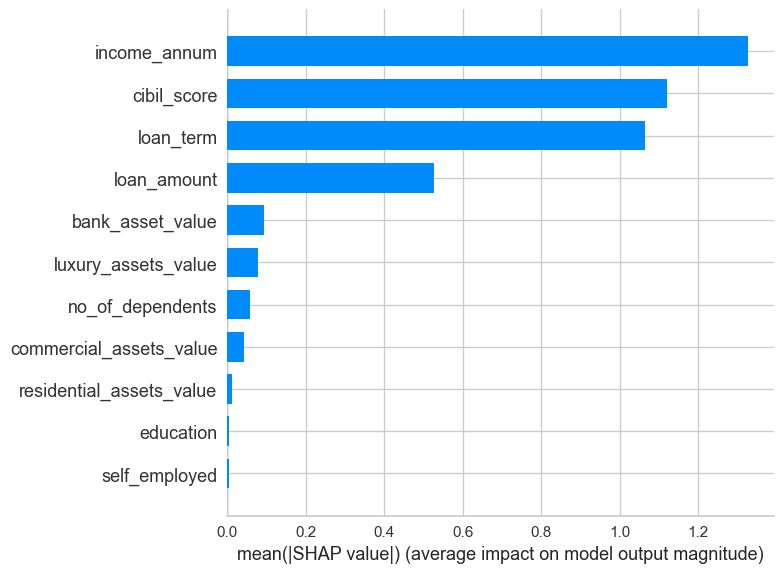

<Figure size 800x550 with 0 Axes>

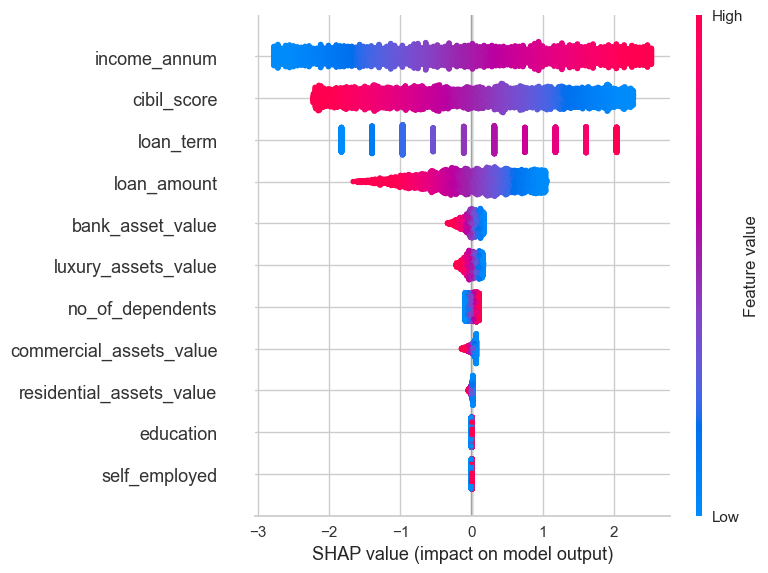

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

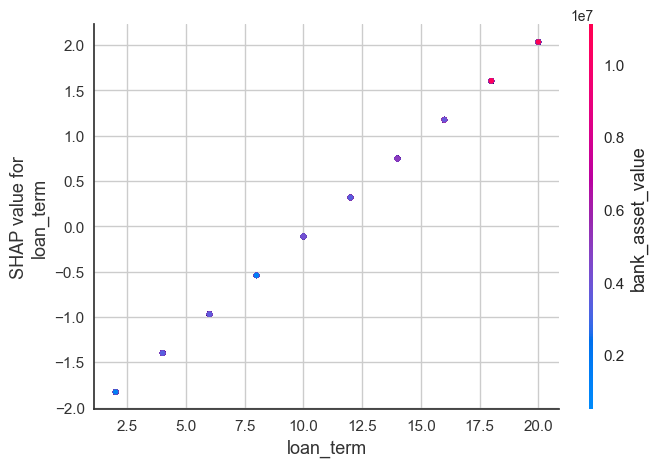

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

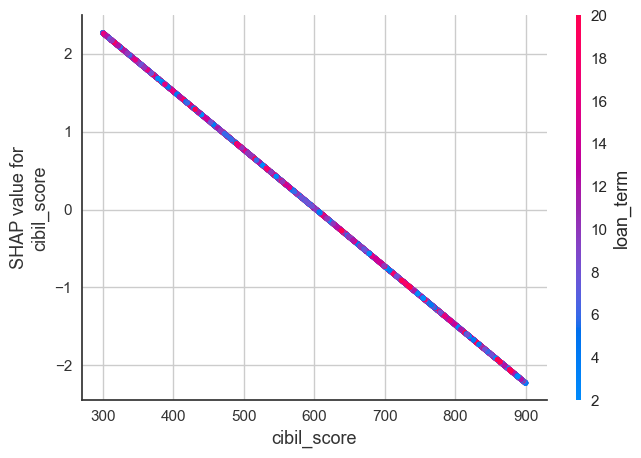

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

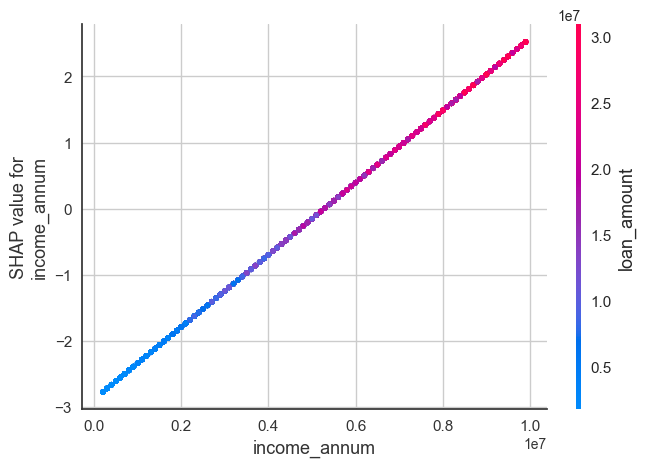

<Figure size 800x550 with 0 Axes>

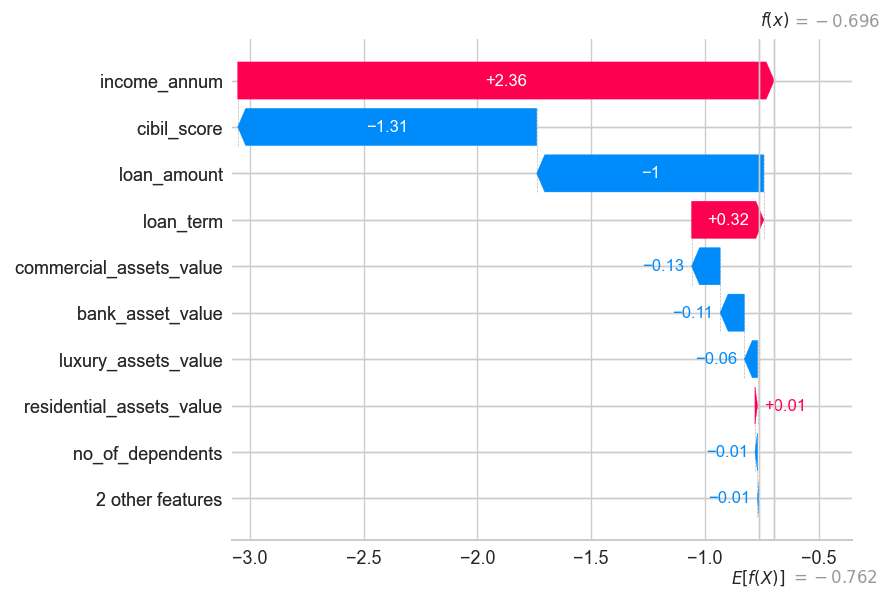

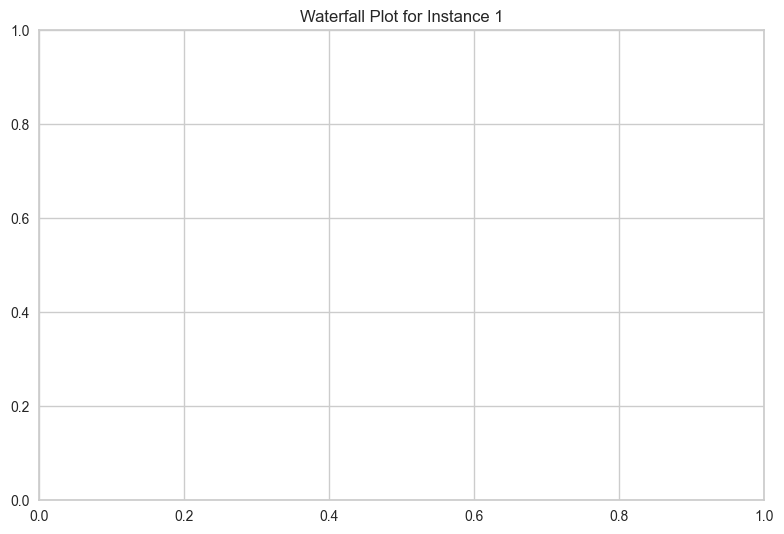

<Figure size 2000x300 with 0 Axes>

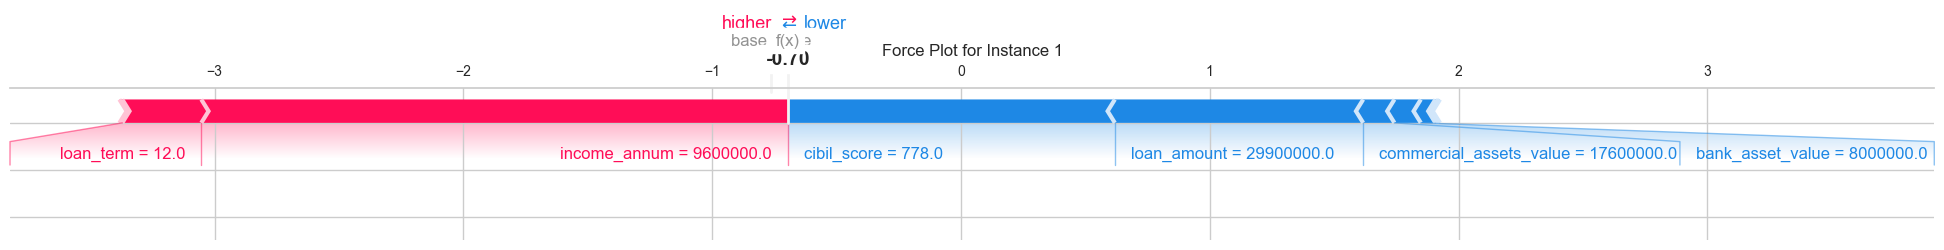

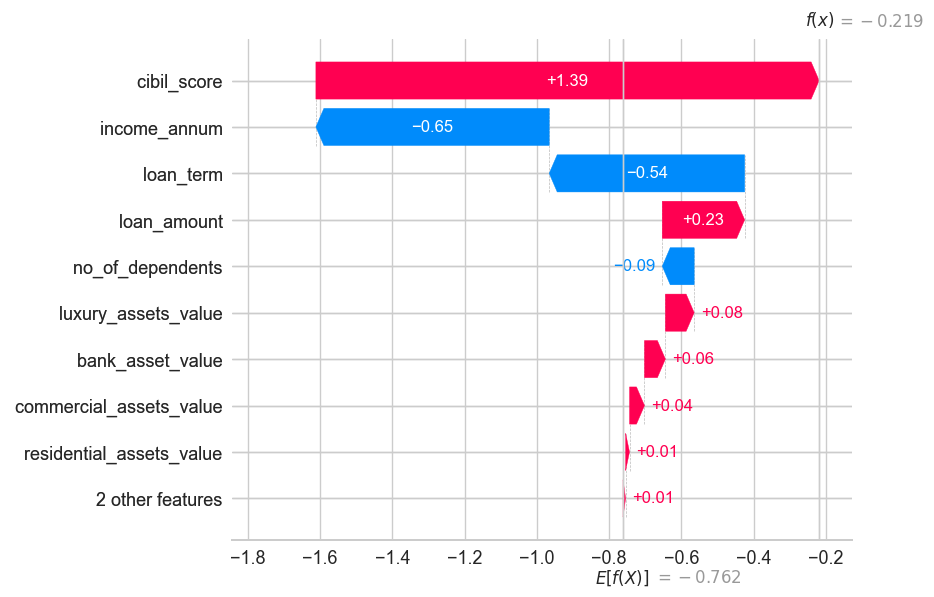

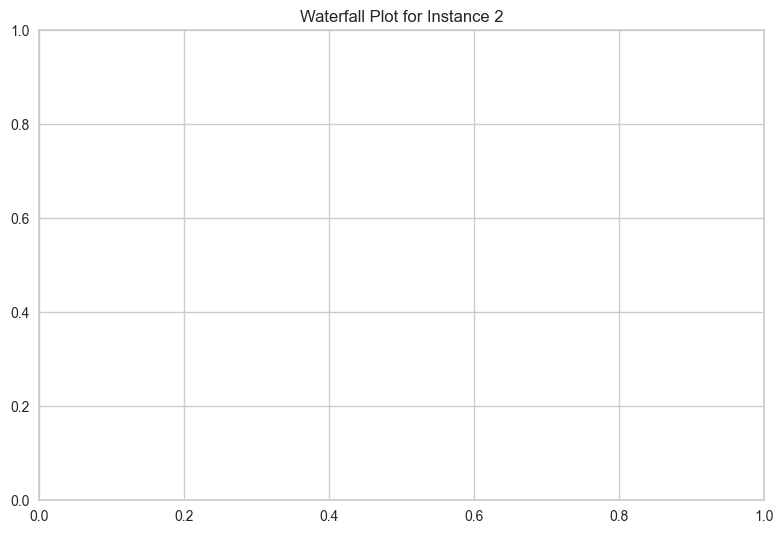

<Figure size 2000x300 with 0 Axes>

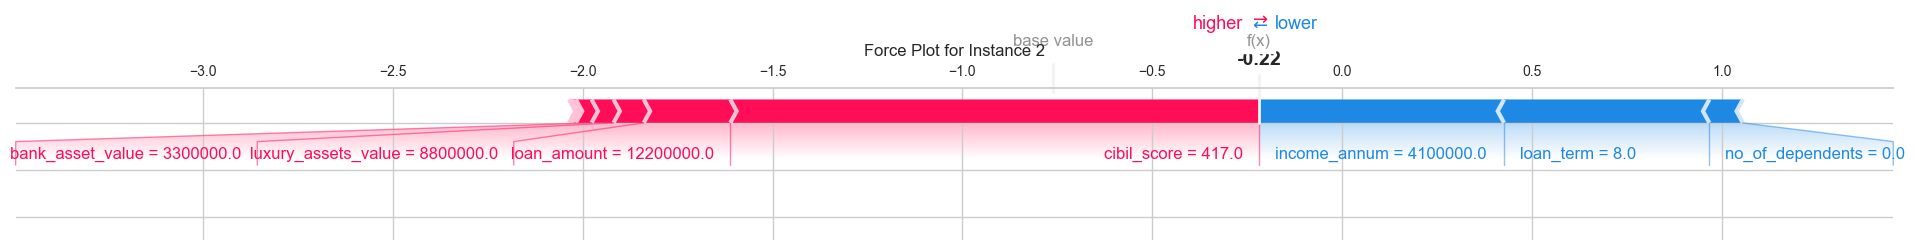

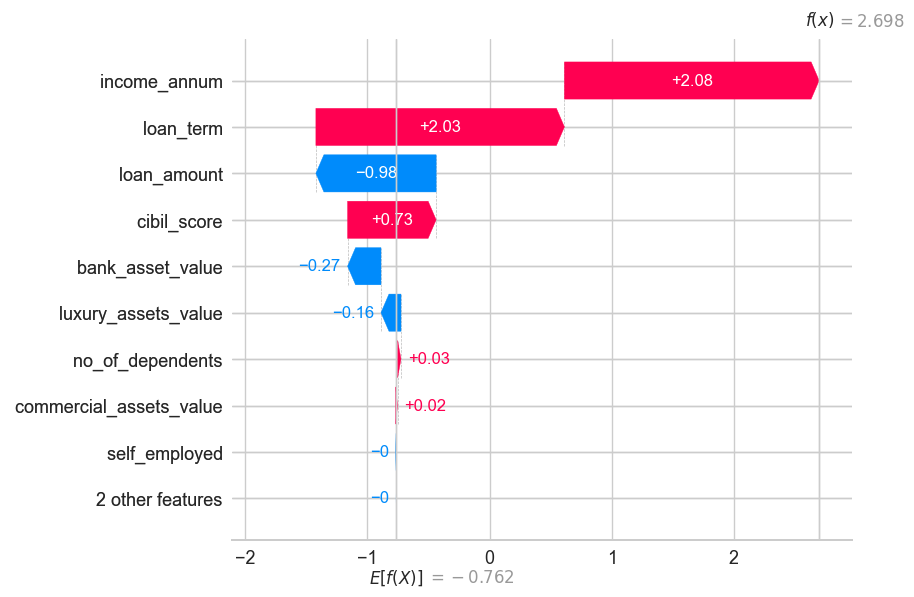

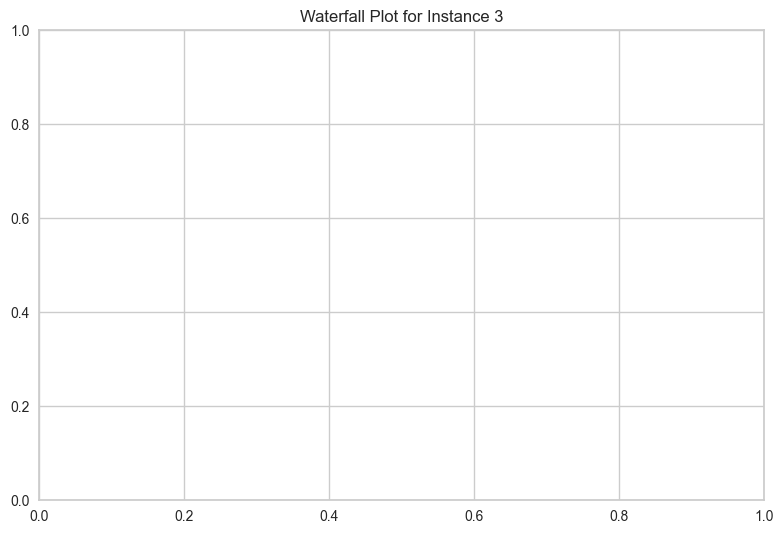

<Figure size 2000x300 with 0 Axes>

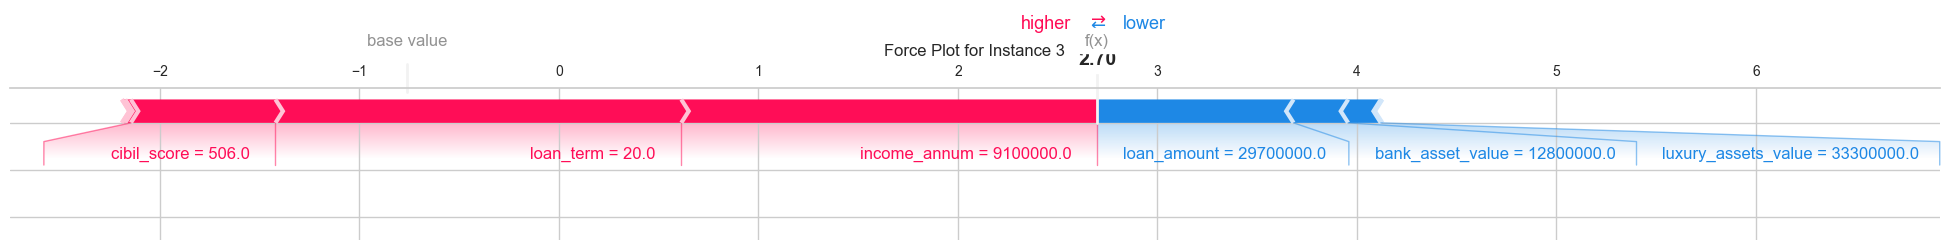

SHAP analysis completed. Plots have been displayed.
   loan_status  prediction_score
0            0            0.6672
1            1            0.5546
2            1            0.9369
3            1            0.5279
4            1            0.9913

Feature Importances:
                     feature  importance
3               income_annum    1.326473
6                cibil_score    1.119098
5                  loan_term    1.063854
4                loan_amount    0.526523
10          bank_asset_value    0.093013
9        luxury_assets_value    0.077531
0           no_of_dependents    0.057678
8    commercial_assets_value    0.042012
7   residential_assets_value    0.012397
1                  education    0.003715
2              self_employed    0.003648


In [9]:
import pandas as pd
import numpy as np
from pycaret.classification import setup, create_model, finalize_model, predict_model, save_model
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

# Clean column names by removing leading/trailing spaces
data.columns = data.columns.str.strip()

# Drop the loan_id column since it's just an identifier
data_cleaned = data.drop(columns=['loan_id'])

# Function to encode categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column].astype(str))
    return df

# Encode categorical variables
data_encoded = encode_categorical(data_cleaned.copy())

# Initialize the PyCaret setup for classification
clf_setup = setup(data_encoded, target='loan_status', fix_imbalance=True, session_id=42)

# Create a logistic regression model
logreg_model = create_model('lr')  # 'lr' stands for Logistic Regression

# Finalize the model to use it for predictions
final_logreg_model = finalize_model(logreg_model)

# Make predictions with probabilities
predictions = predict_model(final_logreg_model, data=data_encoded)

# Save the logistic regression model
save_model(final_logreg_model, 'final_logistic_regression_model')

# Get feature names and target variable
feature_names = data_encoded.drop(columns=['loan_status']).columns
X = data_encoded[feature_names]

# Create a SHAP explainer
explainer = shap.LinearExplainer(final_logreg_model, X)
shap_values = explainer.shap_values(X)

# Display SHAP summary plot (bar plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar")
plt.tight_layout()
plt.show()

# Display SHAP beeswarm plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X)
plt.tight_layout()
plt.show()

# Display SHAP dependence plots for top 3 features
top_features = np.argsort(np.abs(shap_values).mean(0))[-3:]
for feature in top_features:
    plt.figure(figsize=(12, 6))
    shap.dependence_plot(feature, shap_values, X)
    plt.tight_layout()
    plt.show()

# Waterfall and Force plots for 3 sample instances
for i in range(3):
    # Waterfall plot
    plt.figure(figsize=(12, 6))
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], X.iloc[i], max_display=10)
    plt.title(f"Waterfall Plot for Instance {i+1}")
    plt.tight_layout()
    plt.show()
    
    # Force plot
    plt.figure(figsize=(20, 3))
    shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i], matplotlib=True, show=False)
    plt.title(f"Force Plot for Instance {i+1}")
    plt.tight_layout()
    plt.show()

print("SHAP analysis completed. Plots have been displayed.")

# Identify the probability column
prob_column = [col for col in predictions.columns if col.startswith('prediction_score') or col.startswith('Score_')]

if prob_column:
    # Preview predictions with probabilities
    print(predictions[['loan_status', prob_column[0]]].head())
else:
    print("Probability column not found. Here are the available columns:")
    print(predictions.columns)

# Print feature importances
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(shap_values).mean(0)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(4269, 12)"
4,Transformed data shape,"(4999, 12)"
5,Transformed train set shape,"(3718, 12)"
6,Transformed test set shape,"(1281, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8027,0.8860,0.6726,0.7755,0.7204,0.5691,0.5726
1,0.7726,0.8434,0.6814,0.7064,0.6937,0.5129,0.5131
2,0.8261,0.8881,0.7788,0.7652,0.7719,0.6314,0.6315
3,0.7893,0.8980,0.7434,0.7119,0.7273,0.5557,0.5561
4,0.7793,0.8422,0.6637,0.7282,0.6944,0.5222,0.5236
5,0.7592,0.8489,0.6106,0.7113,0.6571,0.4732,0.4765
6,0.8161,0.8981,0.7699,0.7500,0.7598,0.6108,0.6110
7,0.7826,0.8522,0.6018,0.7727,0.6766,0.5167,0.5258
8,0.7550,0.8284,0.6518,0.6822,0.6667,0.4732,0.4735


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7836,0.8617,0.6944,0.7221,0.7080,0.5361,0.5364


Transformation Pipeline and Model Successfully Saved


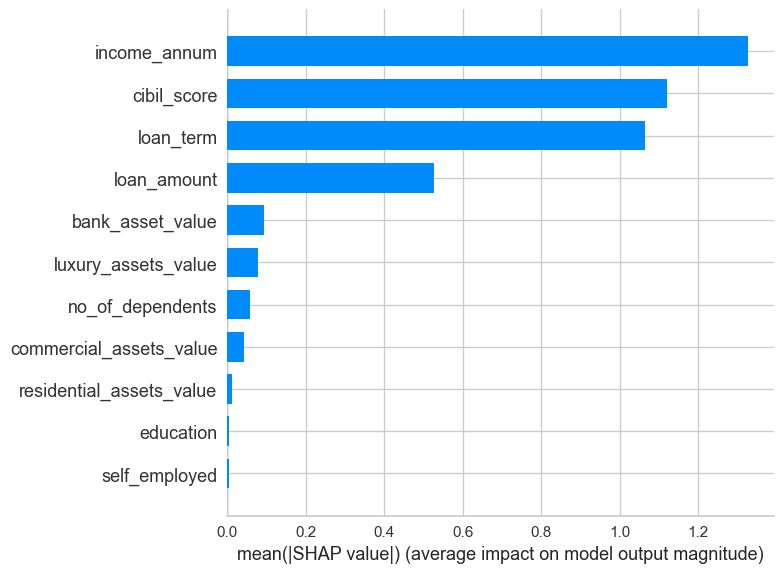

<Figure size 800x550 with 0 Axes>

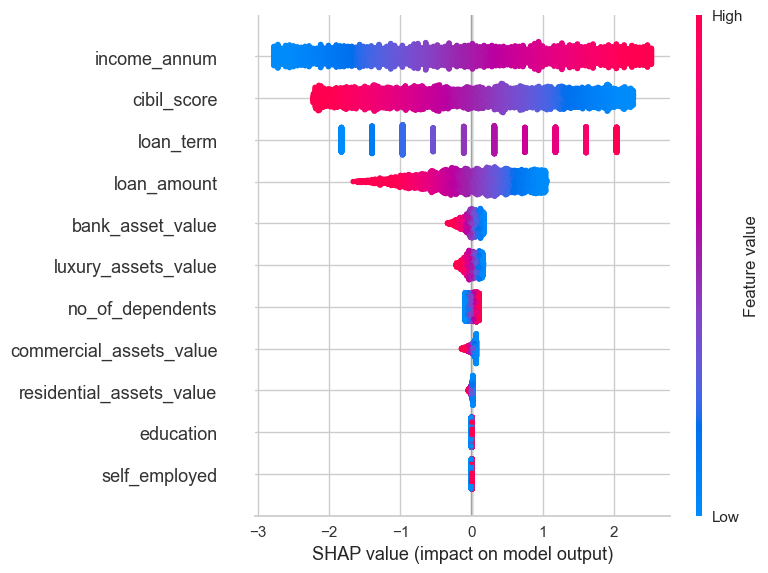

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

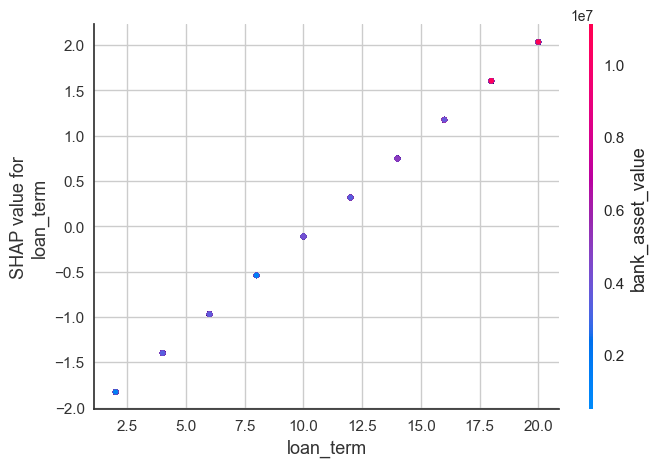

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

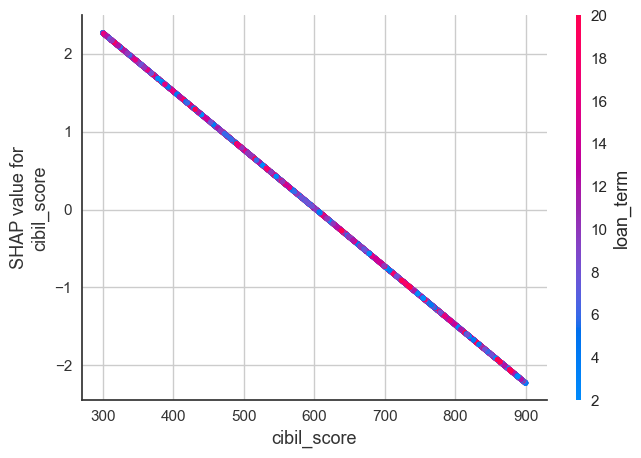

<Figure size 800x550 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

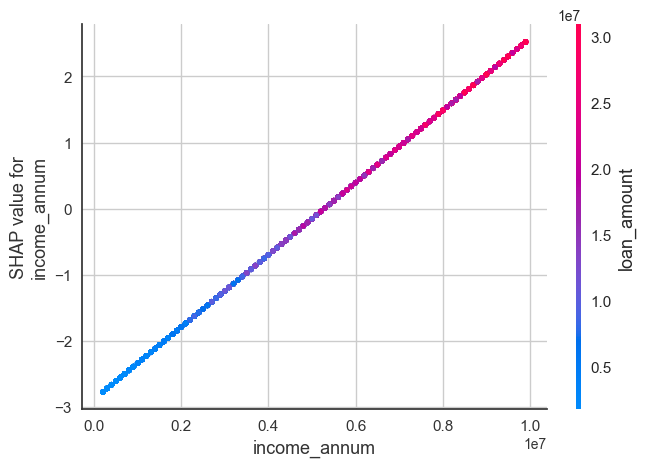

<Figure size 800x550 with 0 Axes>

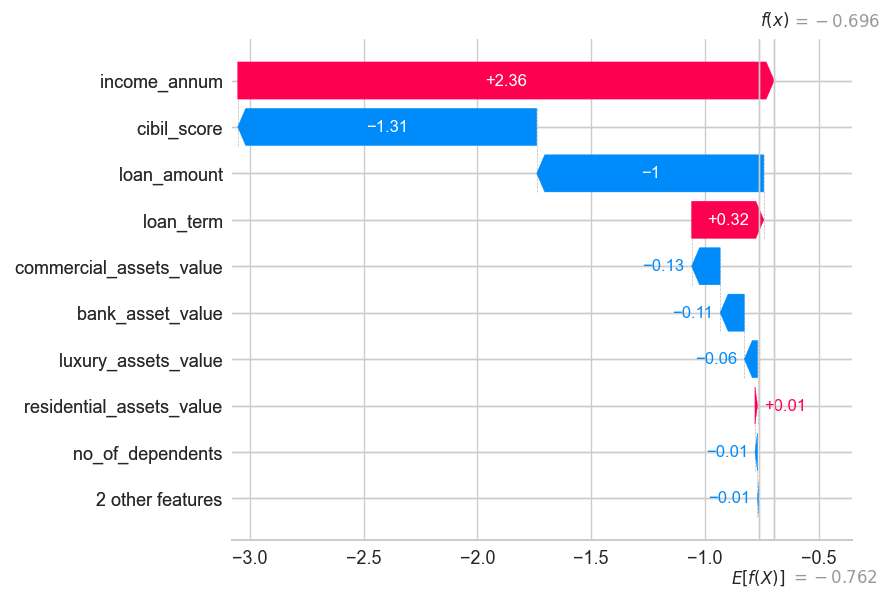

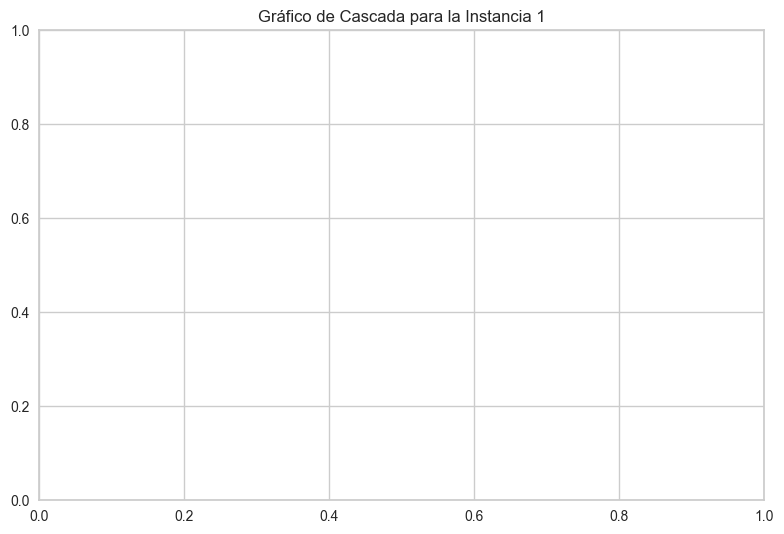

<Figure size 2000x300 with 0 Axes>

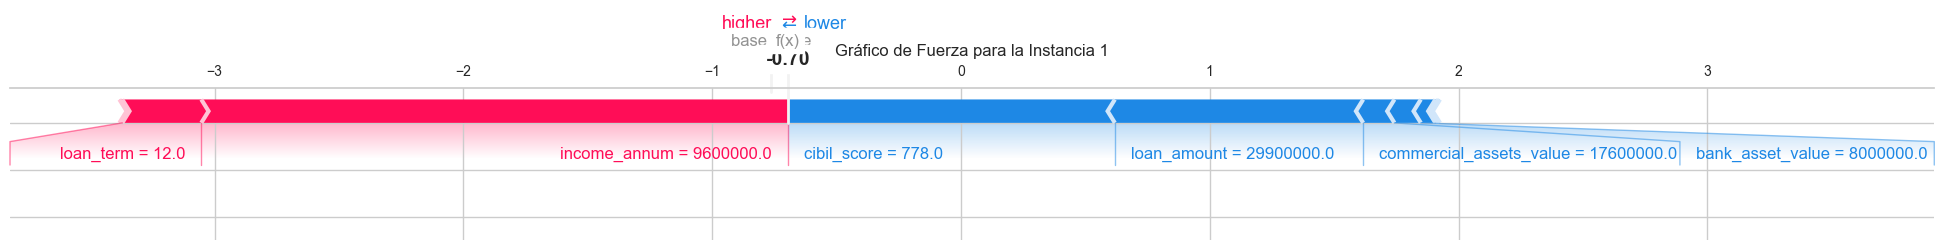

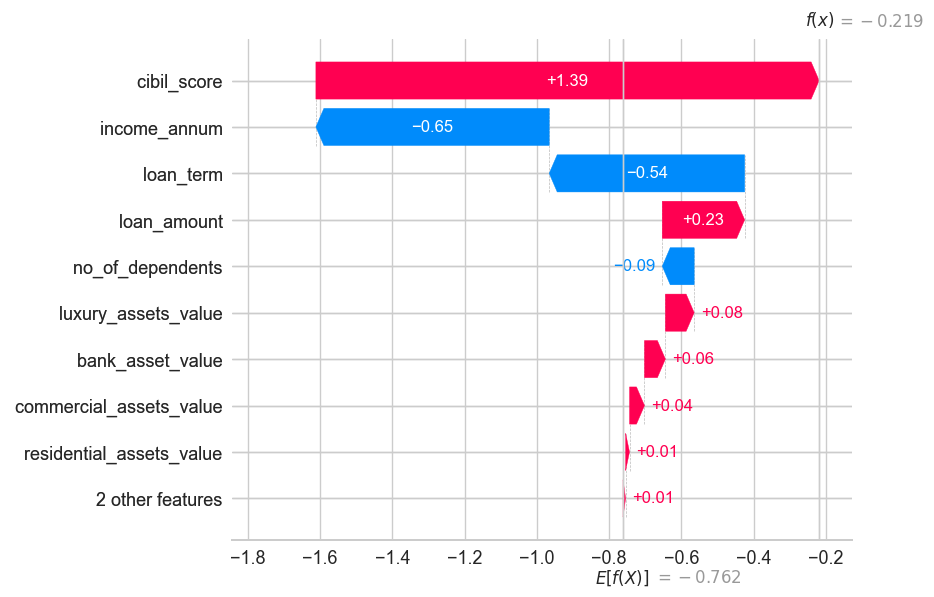

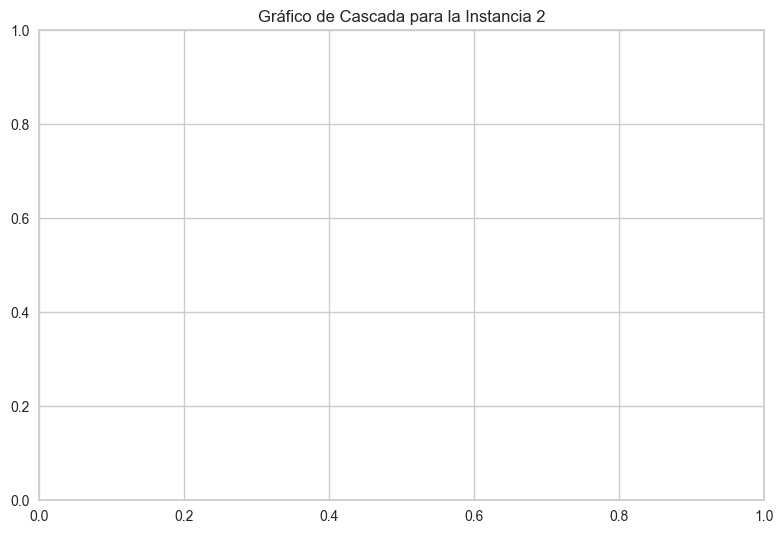

<Figure size 2000x300 with 0 Axes>

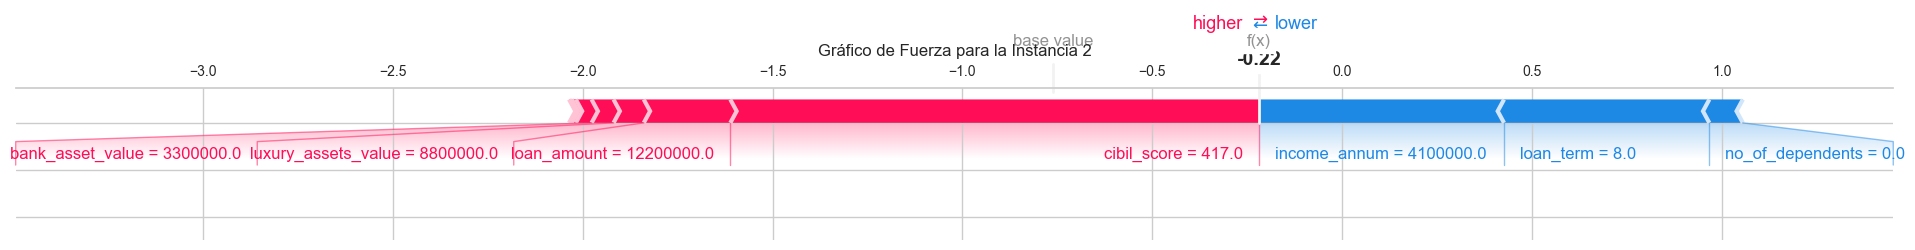

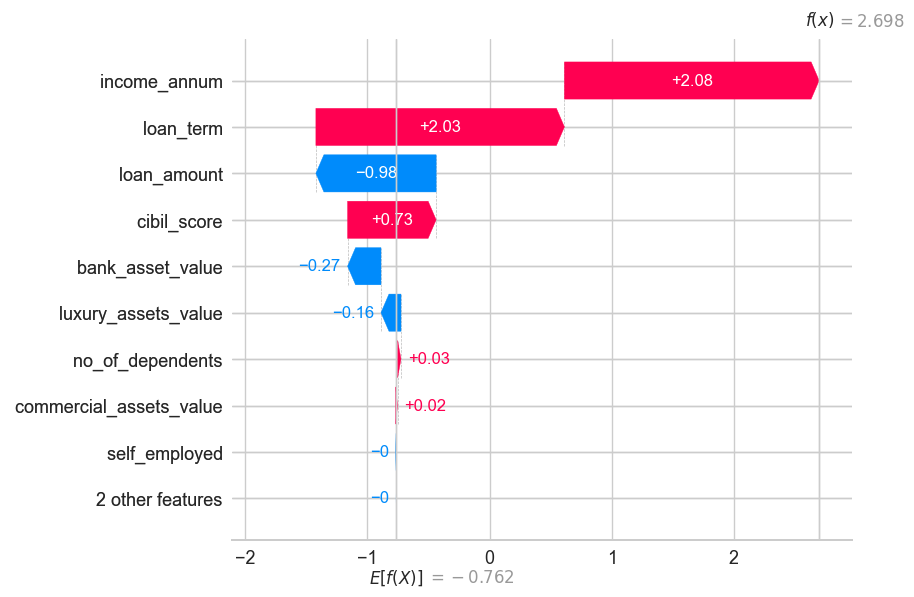

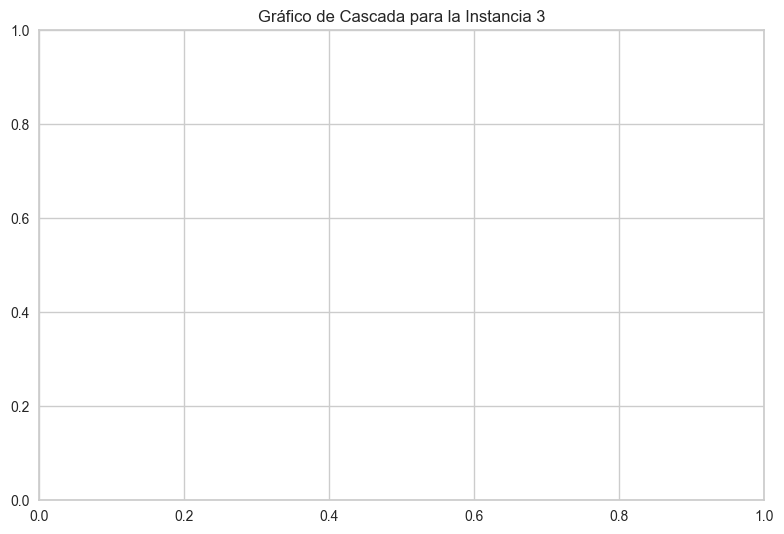

<Figure size 2000x300 with 0 Axes>

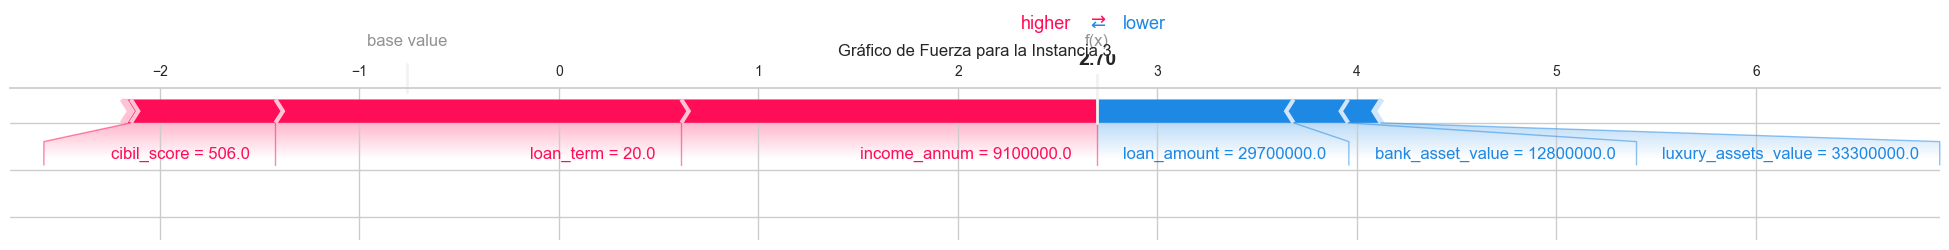

Análisis SHAP completado. Se han mostrado los gráficos.
   loan_status  prediction_score
0            0            0.6672
1            1            0.5546
2            1            0.9369
3            1            0.5279
4            1            0.9913

Importancias de Características:
              característica  importancia
3               income_annum     1.326473
6                cibil_score     1.119098
5                  loan_term     1.063854
4                loan_amount     0.526523
10          bank_asset_value     0.093013
9        luxury_assets_value     0.077531
0           no_of_dependents     0.057678
8    commercial_assets_value     0.042012
7   residential_assets_value     0.012397
1                  education     0.003715
2              self_employed     0.003648


In [10]:
import pandas as pd
import numpy as np
from pycaret.classification import setup, create_model, finalize_model, predict_model, save_model
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos
data = pd.read_csv('loan_approval_dataset.csv')

# Limpiar los nombres de las columnas eliminando espacios al inicio y al final
data.columns = data.columns.str.strip()

# Eliminar la columna loan_id ya que es solo un identificador
data_cleaned = data.drop(columns=['loan_id'])

# Función para codificar variables categóricas
def encode_categorical(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column].astype(str))
    return df

# Codificar variables categóricas
data_encoded = encode_categorical(data_cleaned.copy())

# Inicializar la configuración de PyCaret para clasificación
clf_setup = setup(data_encoded, target='loan_status', fix_imbalance=True, session_id=42)

# Crear un modelo de regresión logística
logreg_model = create_model('lr')  # 'lr' significa Regresión Logística

# Finalizar el modelo para usarlo en predicciones
final_logreg_model = finalize_model(logreg_model)

# Hacer predicciones con probabilidades
predictions = predict_model(final_logreg_model, data=data_encoded)

# Guardar el modelo de regresión logística
save_model(final_logreg_model, 'final_logistic_regression_model')

# Obtener nombres de características y variable objetivo
feature_names = data_encoded.drop(columns=['loan_status']).columns
X = data_encoded[feature_names]

# Crear un explicador SHAP
explainer = shap.LinearExplainer(final_logreg_model, X)
shap_values = explainer.shap_values(X)

# Mostrar gráfico de resumen SHAP (gráfico de barras)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar")
plt.tight_layout()
plt.show()

# Mostrar gráfico de enjambre SHAP
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X)
plt.tight_layout()
plt.show()

# Mostrar gráficos de dependencia SHAP para las 3 características principales
top_features = np.argsort(np.abs(shap_values).mean(0))[-3:]
for feature in top_features:
    plt.figure(figsize=(12, 6))
    shap.dependence_plot(feature, shap_values, X)
    plt.tight_layout()
    plt.show()

# Gráficos de cascada y fuerza para 3 instancias de muestra
for i in range(3):
    # Gráfico de cascada
    plt.figure(figsize=(12, 6))
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], X.iloc[i], max_display=10)
    plt.title(f"Gráfico de Cascada para la Instancia {i+1}")
    plt.tight_layout()
    plt.show()
    
    # Gráfico de fuerza
    plt.figure(figsize=(20, 3))
    shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i], matplotlib=True, show=False)
    plt.title(f"Gráfico de Fuerza para la Instancia {i+1}")
    plt.tight_layout()
    plt.show()

print("Análisis SHAP completado. Se han mostrado los gráficos.")

# Identificar la columna de probabilidad
prob_column = [col for col in predictions.columns if col.startswith('prediction_score') or col.startswith('Score_')]

if prob_column:
    # Vista previa de predicciones con probabilidades
    print(predictions[['loan_status', prob_column[0]]].head())
else:
    print("Columna de probabilidad no encontrada. Aquí están las columnas disponibles:")
    print(predictions.columns)

# Imprimir importancias de características
feature_importance = pd.DataFrame({'característica': feature_names, 'importancia': np.abs(shap_values).mean(0)})
feature_importance = feature_importance.sort_values('importancia', ascending=False)
print("\nImportancias de Características:")
print(feature_importance)